<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [17]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [18]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


##### For the "Median value of owner-occupied homes" provide a boxplot

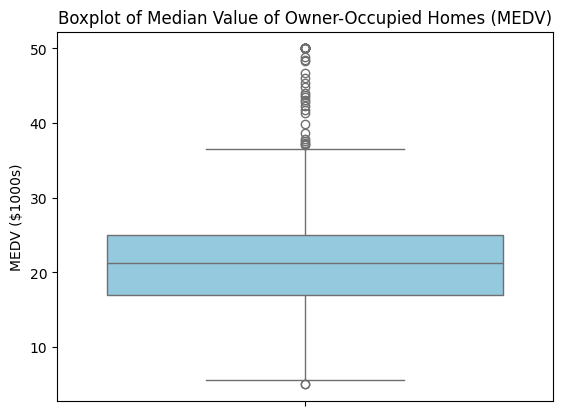

In [33]:
sns.boxplot(y=boston_df['MEDV'], color='skyblue')
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
pyplot.ylabel('MEDV ($1000s)')
pyplot.show()

#### Provide a  bar plot for the Charles river variable

<ipython-input-26-452a21d261d9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CHAS', data=boston_df, palette='viridis')


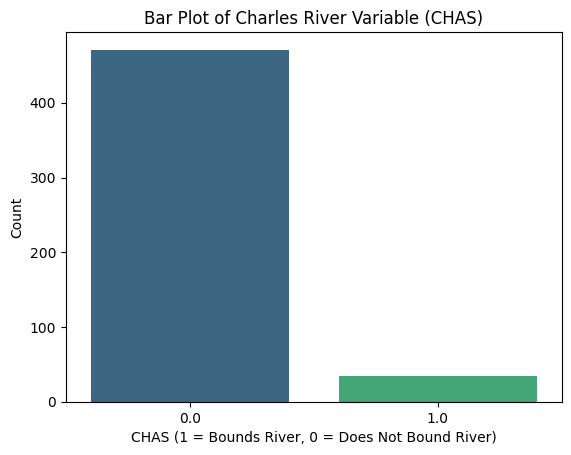

In [26]:
sns.countplot(x='CHAS', data=boston_df, palette='viridis')
pyplot.title('Bar Plot of Charles River Variable (CHAS)')
pyplot.xlabel('CHAS (1 = Bounds River, 0 = Does Not Bound River)')
pyplot.ylabel('Count')
pyplot.show()

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

<ipython-input-32-e8f1e2557b43>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, palette='Set2')


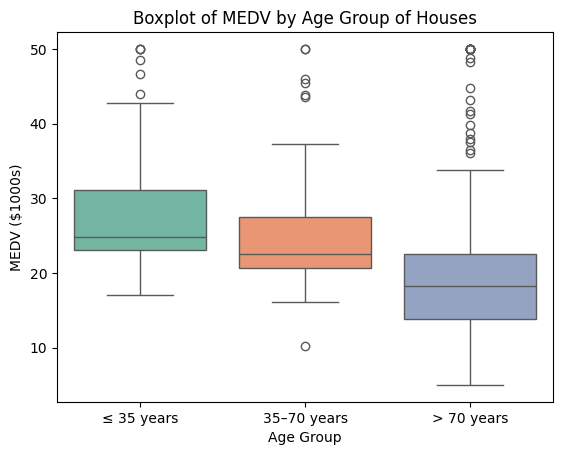

In [32]:
bins = [0, 35, 70, float('inf')]
labels = ['≤ 35 years', '35–70 years', '> 70 years']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, palette='Set2')
pyplot.title('Boxplot of MEDV by Age Group of Houses')
pyplot.xlabel('Age Group')
pyplot.ylabel('MEDV ($1000s)')
pyplot.show()

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

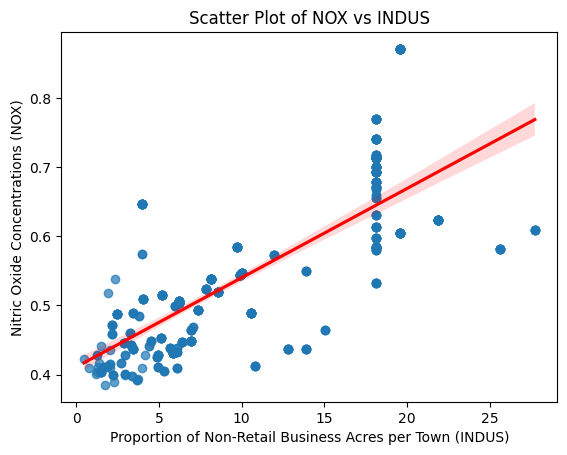

Pearson correlation coefficient: 0.764


In [31]:
sns.regplot(x='INDUS', y='NOX', data=boston_df, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
pyplot.title('Scatter Plot of NOX vs INDUS')
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxide Concentrations (NOX)')
pyplot.show()

corr_coef = boston_df[['INDUS', 'NOX']].corr(method='pearson').iloc[0,1]
print(f"Pearson correlation coefficient: {corr_coef:.3f}")

#### Create a histogram for the pupil to teacher ratio variable

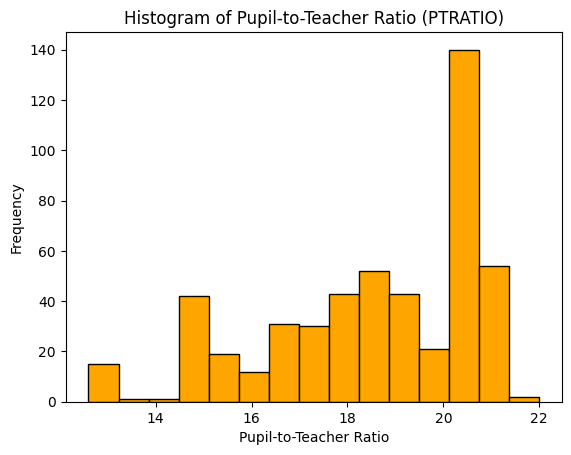

In [30]:
pyplot.hist(boston_df['PTRATIO'].dropna(), bins=15, color='orange', edgecolor='black')
pyplot.title('Histogram of Pupil-to-Teacher Ratio (PTRATIO)')
pyplot.xlabel('Pupil-to-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

### Task 3: Use the appropriate tests to answer the questions provided.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [35]:
from scipy import stats

###### H0: There is no difference in median home value between houses that bound the Charles River (CHAS=1) and those that do not (CHAS=0)
###### H1: There is a difference in median home value between the two groups

In [36]:
alpha = 0.05

In [37]:
# Data Split
chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

In [38]:
# t-est
t_stat, p_val = stats.ttest_ind(chas0, chas1, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: -3.113291312794837
P-value: 0.003567170098137517


##### Since p-value (0.0036) < alpha (0.05), we reject H0.
##### Conclusion: There is a statistically significant difference in median home value between houses that bound the Charles River and those that do not.

##### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

###### H0: All AGE groups have the same median home value (MEDV)
###### H1: At least one AGE group has a different median home value

In [41]:
bins = [0, 35, 70, float('inf')]
labels = ['≤ 35 years', '35–70 years', '> 70 years']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=True, include_lowest=True)

In [42]:
group1 = boston_df[boston_df['AGE_GROUP'] == '≤ 35 years']['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == '35–70 years']['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == '> 70 years']['MEDV']

In [43]:
f_stat, p_val = stats.f_oneway(group1, group2, group3)

print("F-statistic:", f_stat)
print("P-value:", p_val)

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


###### Since p-value (0.0000) < alpha (0.05), we reject H0.
###### Conclusion: There is a statistically significant difference in median home values between at least two AGE groups.

In [47]:
corr_coef, p_val = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Pearson correlation coefficient (r):", corr_coef)
print("P-value:", p_val)    

Pearson correlation coefficient (r): 0.7636514469209192
P-value: 7.913361061210442e-98


##### Since p-value (0.0000) < alpha (0.05), we reject H0.
##### Conclusion: There is a statistically significant correlation between NOX and INDUS.
##### The correlation is positive: higher industrial land proportion is associated with higher NOX levels.


##### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

###### H0: β1 = 0 (no relationship between DIS and MEDV)
###### H1: β1 ≠ 0 (a relationship exists between DIS and MEDV)

In [48]:
X = boston_df['DIS']
y = boston_df['MEDV']

In [51]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
slope = model.params['DIS']
p_val = model.pvalues['DIS']

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 10 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        19:20:48   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

##### Since p-value (0.0000) < alpha (0.05), we reject H0.
##### Conclusion: There is a statistically significant relationship between DIS and MEDV.
##### Interpretation: For each additional unit of weighted distance to employment centres, the median home value changes by 1.09 (in $1000s).